# Regresión logística

Best parameters: {'C': 1.0, 'penalty': 'l2'}
Precision: 81.0%


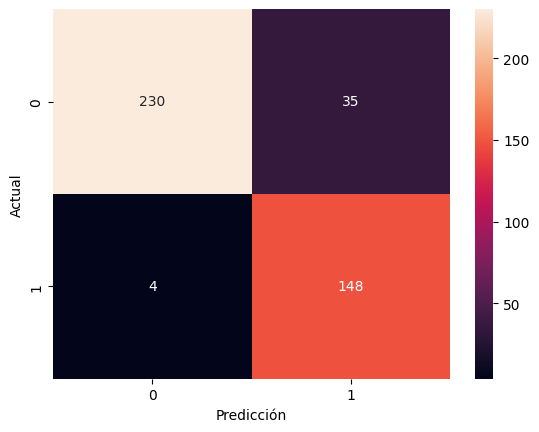

In [8]:
import os.path
os.chdir('c:\\Users\\aesca\\Documents\\TEC\\Académico\\7mo semestre\\Reto_Titanic_TC3006C\\')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score
import warnings
warnings.filterwarnings('ignore')

# Load train data using os path
train = pd.read_csv('./data/train_clean.csv')
# Load test data
test = pd.read_csv('./data/test_clean.csv')

# Drop the columns that are not needed in the train dataset
x_train = train.drop('Survived', axis=1)
y_train = train['Survived']

# Drop the columns that are not needed in the test dataset
x_test = test.drop('Survived', axis=1)
y_test = test['Survived']

# Use GridSearchCV to find best parameters
param_grid = {
    'C': [0.001, 0.01, 0.1, 1., 10.],
    'penalty': ['l1', 'l2']
}
grid_search = GridSearchCV(LogisticRegression(class_weight='balanced', solver='liblinear'), param_grid, cv=5, scoring='precision')
grid_search.fit(x_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')

# Predict with best parameters
y_pred = grid_search.predict(x_test)
precision = grid_search.score(x_test, y_test)
print(f'Precision: {precision.round(2)*100}%')


# Confusion Matrix plot
confusion_matrix_2 = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(confusion_matrix_2, annot=True, fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Actual')
plt.show()

In [9]:
# Print model coefficients and the variable names to see which variables are important
coef = grid_search.best_estimator_.coef_
cols = x_train.columns
# Combine the two arrays into a dataframe
coef_df = pd.DataFrame(coef, columns=cols)
coef_df

,PassengerId,Pclass,Age,Fare,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Alone,Large,Medium,Small,Female,Male
0,0.000115,-0.859083,-0.032974,0.003325,0.502869,0.546871,0.115714,1.20432,-0.370426,-1.039786,1.371347,1.85337,-0.687915


In [ ]:
# Fill a model predict with a male with an age of 25 that paid 100 for the ticket, traveled in Pclass 1 and embarked from Cherbourg, it should have 9 features
print(grid_search.predict([[3, 32, 56, 0, 0, 1, 1, 0, 0, 0, 0, 1]]))

[0]


In [ ]:
# Pclass = 1, male check if survived in train
variable = train[(train['Male'] == 1)&(train['Survived'] == 1)&(train['Pclass'] == 3) & (train['Alone'] == 1)]
print(len(variable))
variable

32


,Survived,Pclass,Age,Fare,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Alone,Large,Medium,Small,Female,Male
36,1,3,47.0,7.2292,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
73,1,3,32.0,56.4958,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
80,1,3,29.0,9.5000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
106,1,3,47.0,7.7750,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
126,1,3,24.0,7.1417,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
145,1,3,27.0,7.7958,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
203,1,3,18.0,8.0500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
206,1,3,26.0,18.7875,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
219,1,3,16.0,8.0500,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
270,1,3,25.0,0.0000,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Decision Tree Clasiifier with graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

# Create a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

# Plot the tree with graphviz
dot_data = export_graphviz(clf, out_file=None, feature_names=x_train.columns, class_names=['Died', 'Survived'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('titanic_tree')
graph.view()

'titanic_tree.pdf'